<a href="https://colab.research.google.com/github/fdavenport/CIVE480A6-climate-change-impacts/blob/main/lectures/05_Analyzing_the_Hydrologic_Cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIVE 480A6: Climate Change Risks and Impacts
## Week 6: Analyzing the Hydrologic Cycle - Precipitation patterns

Today's Objectives:
1. Analyze daily precipitation patterns to see how precipitation is changing.
2. Learn how to calculate summary statistics like seasonal patterns or biggest rain event of the year (annual maximum).
3. Learn how to use "for loops" in python.

## Part 1: Daily Precipitation Data

Today we will be looking at daily precipitation data. This data comes from the [Global Historical climatology Network (GHCN-D)](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily).  

<img src="https://raw.githubusercontent.com/fdavenport/CIVE480A6-climate-change-impacts/main/lectures/img/ghcn_precip_station_map.png" width="700">

We will be looking specifically at data from a weather station at the airport in St. Louis, Missouri.

<img src="https://raw.githubusercontent.com/fdavenport/CIVE480A6-climate-change-impacts/main/lectures/img/st_louis_map.png" width="400">

In [1]:
# The data has already been added to the course github page at the following link:

stl_precip_data_url = "https://raw.githubusercontent.com/fdavenport/CIVE480A6-climate-change-impacts/refs/heads/main/lectures/data/USW00013994_st_louis_precip.csv"


In [2]:
# we are working with tabular data in a .csv file, so we need to import the pandas library
import pandas as pd


In [3]:
# read in the data
stl_data = pd.read_csv(stl_precip_data_url)


In [4]:
pd.to_datetime(stl_data["DATE"])

,DATE
0,1950-01-01
1,1950-01-02
2,1950-01-03
3,1950-01-04
4,1950-01-05
...,...
27023,2023-12-27
27024,2023-12-28
27025,2023-12-29
27026,2023-12-30


In [5]:
# add some columns with information about the date

stl_data["DATE"] = pd.to_datetime(stl_data["DATE"])

stl_data["year"] = stl_data["DATE"].dt.year
stl_data["month"] = stl_data["DATE"].dt.month
stl_data["month_name"] = stl_data["DATE"].dt.month_name()

stl_data.set_index("DATE", inplace=True)


In [6]:
stl_data["2002-01-01":"2002-12-31"]

,STATION,PRCP_mm,year,month,month_name
DATE,,,,,
2002-01-01,USW00013994,0.0,2002,1,January
2002-01-02,USW00013994,0.0,2002,1,January
2002-01-03,USW00013994,0.0,2002,1,January
2002-01-04,USW00013994,0.0,2002,1,January
2002-01-05,USW00013994,2.3,2002,1,January
...,...,...,...,...,...
2002-12-27,USW00013994,0.0,2002,12,December
2002-12-28,USW00013994,0.0,2002,12,December
2002-12-29,USW00013994,0.0,2002,12,December


In [7]:
# we will use the same plotting package as before

import matplotlib.pyplot as plt


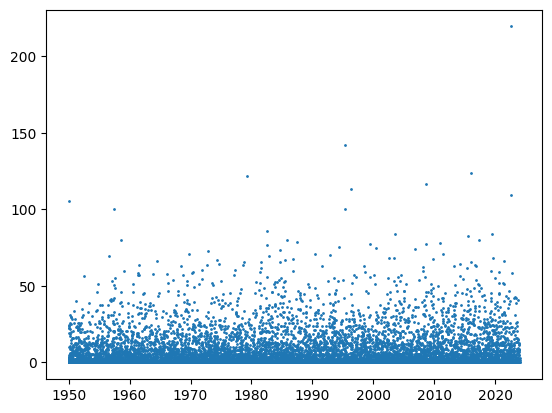

In [8]:
# make a plot of the data

fig, ax = plt.subplots()

ax.scatter(x = stl_data.index, y = stl_data["PRCP_mm"], s = 1)


In [9]:
# get a summary of the data

stl_data.describe()

,PRCP_mm,year,month
count,27028.000000,27028.000000,27028.000000
mean,2.687894,1986.499667,6.523013
std,7.894123,21.360010,3.448744
min,0.000000,1950.000000,1.000000
25%,0.000000,1968.000000,4.000000
50%,0.000000,1986.500000,7.000000
75%,0.800000,2005.000000,10.000000
max,219.500000,2023.000000,12.000000


Text(0, 0.5, 'number of days')

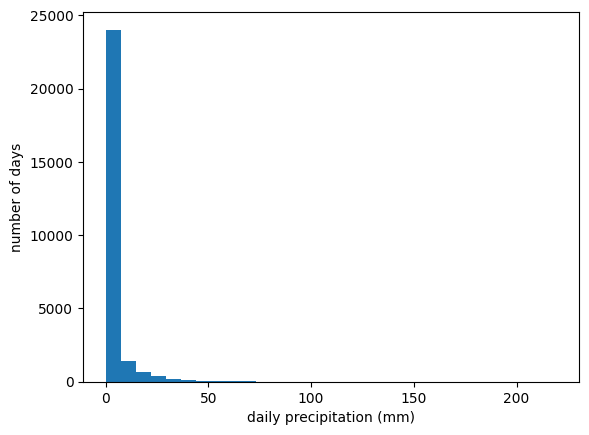

In [10]:
# create a histogram of the daily precipitation data

fig, ax = plt.subplots()

ax.hist(x = stl_data["PRCP_mm"], bins = 30)
ax.set_xlabel("daily precipitation (mm)")
ax.set_ylabel("number of days")

## Part 2: Seasonal precipitation patterns

Next, we are going to calculate the average amount of precipitation during each month of the year, and look at how that has changed over time

In [11]:
month_averages = pd.DataFrame(columns = ["month", "average_precip"], index = range(12))

month_averages

,month,average_precip
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [12]:
data_jan = stl_data.loc[stl_data["month_name"] == "January"]

data_jan["PRCP_mm"].mean()

1.7928509154315606

In [13]:
month_averages.loc[0, "month"] = "January"
month_averages.loc[0, "average_precip"] = data_jan["PRCP_mm"].mean()

In [14]:
month_averages

,month,average_precip
0,January,1.792851
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [15]:
x = 100
for i in range(0, 10):
  print(i)
  x = x+i
  print("x = ", x)



0
x =  100
1
x =  101
2
x =  103
3
x =  106
4
x =  110
5
x =  115
6
x =  121
7
x =  128
8
x =  136
9
x =  145


In [16]:
month_list = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [17]:
for m in month_list:
  print(m)

January
February
March
April
May
June
July
August
September
October
November
December


In [18]:
for i, m in enumerate(month_list):
  print("i = ", i, ", month = ", m)

i =  0 , month =  January
i =  1 , month =  February
i =  2 , month =  March
i =  3 , month =  April
i =  4 , month =  May
i =  5 , month =  June
i =  6 , month =  July
i =  7 , month =  August
i =  8 , month =  September
i =  9 , month =  October
i =  10 , month =  November
i =  11 , month =  December


In [44]:
x = 10

In [21]:
stl_data["month"]

,month
DATE,
1950-01-01,1
1950-01-02,1
1950-01-03,1
1950-01-04,1
1950-01-05,1
...,...
2023-12-27,12
2023-12-28,12
2023-12-29,12


In [45]:
x

10

In [46]:
y = x*3

In [47]:
y

30

## Part 3: Calculating changes in annual statistics

Next, we are going to calculate the total amount of precipitation each year and the maximum amount falling on a single day. We will then calculate trends in those metrics.